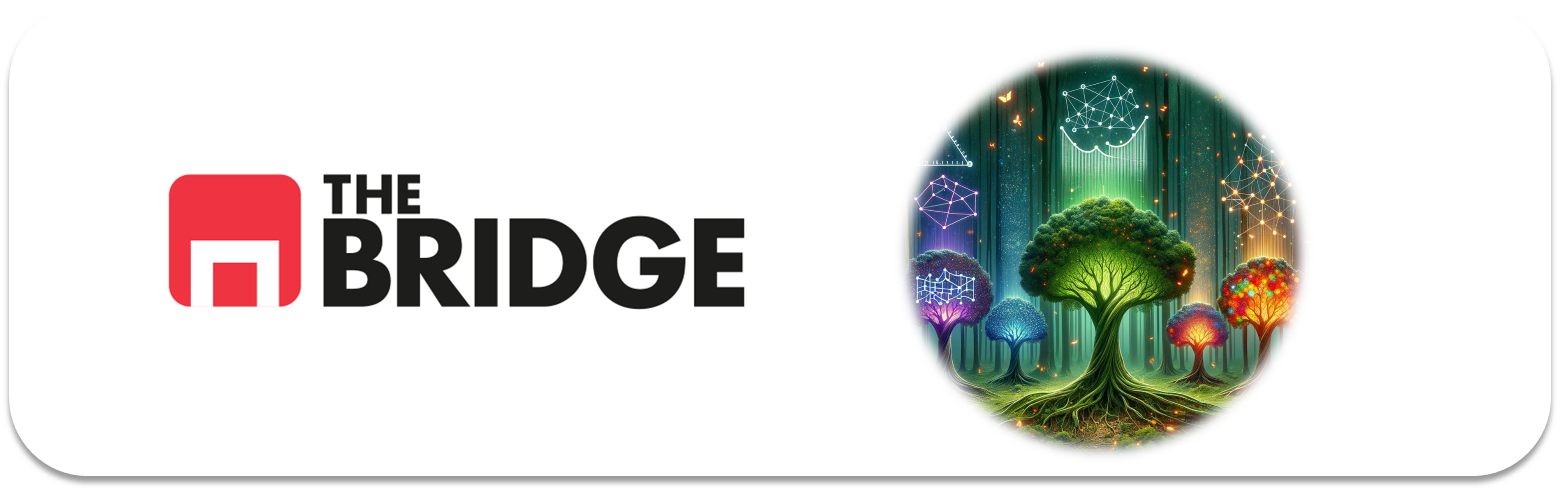

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("deep")

from bootcampviztools import plot_categorical_relationship_fin
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [2]:
df = pd.read_csv("./data/bank-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
# Selección del target y separación de variables categóricas y numéricas:
target = "y"
cat = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]
num = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

<Axes: >

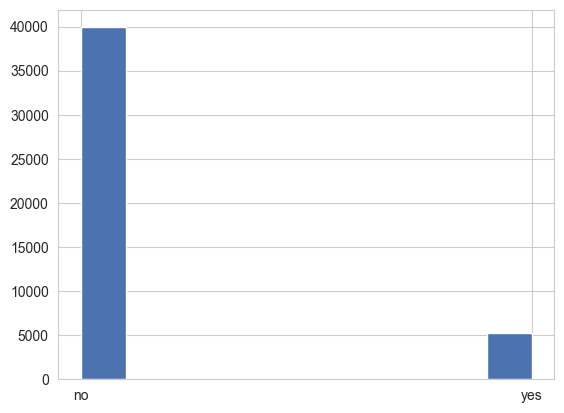

In [7]:
# Vemos la distribución del target:
df.y.hist()

Tenemos un target con una distribución muy desplazada, por lo que tendremos que tenerlo en cuenta.

In [8]:
# Hacemos el split en train y test:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

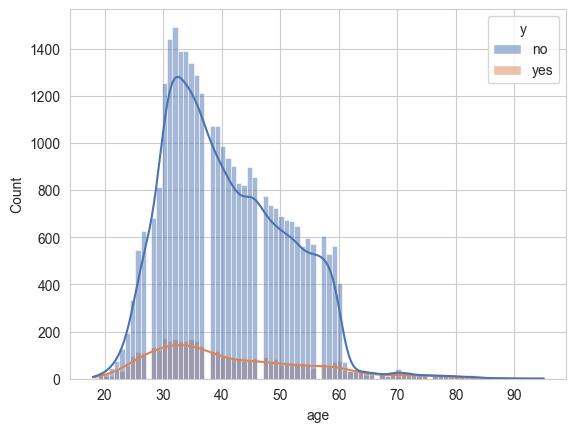

In [9]:
sns.histplot(train, x = "age", hue = target, kde = True);

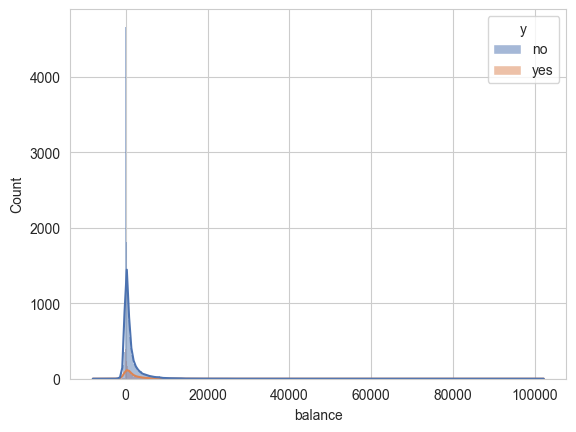

In [10]:
sns.histplot(train, x = "balance", hue = target, kde = True);

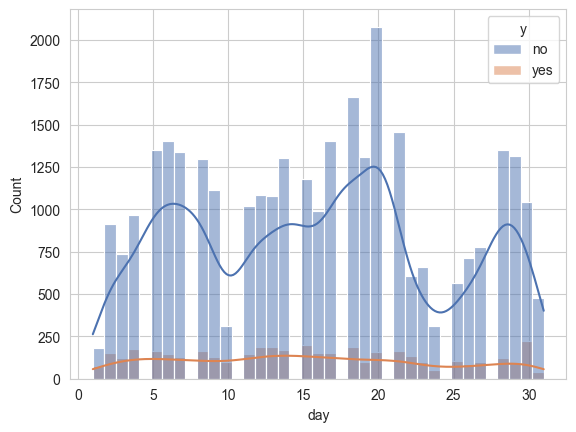

In [11]:
sns.histplot(train, x = "day", hue = target, kde = True);

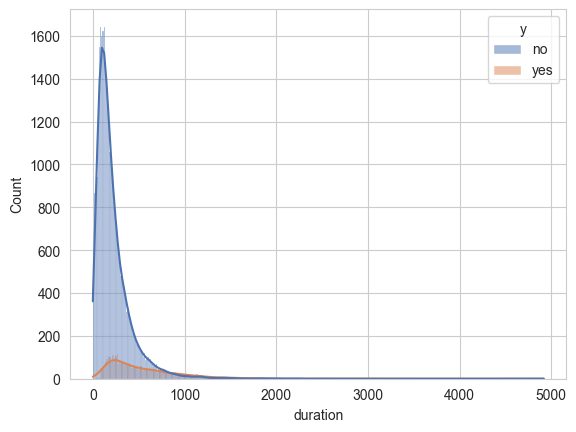

In [29]:
sns.histplot(train, x = "duration", hue = target, kde = True);

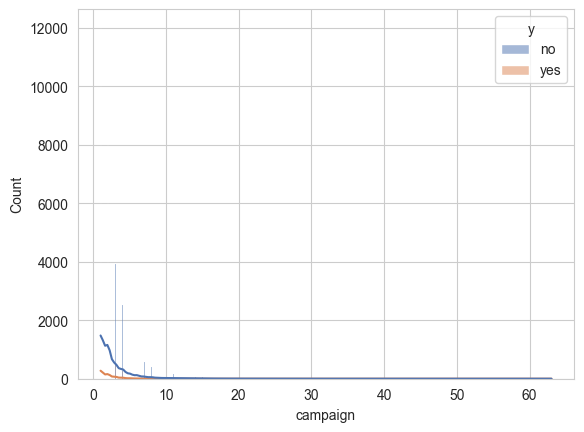

In [30]:
sns.histplot(train, x = "campaign", hue = target, kde = True);

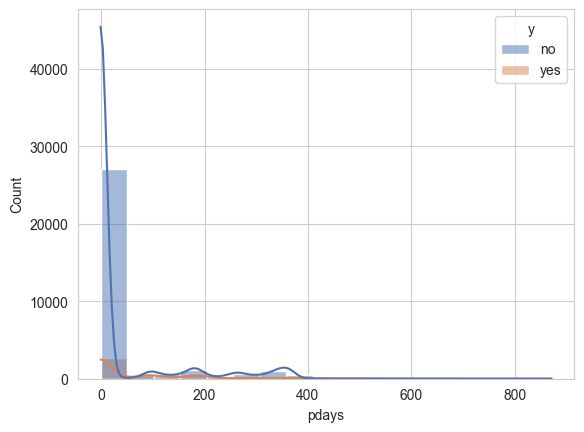

In [14]:
sns.histplot(train, x = "pdays", hue = target, kde = True);

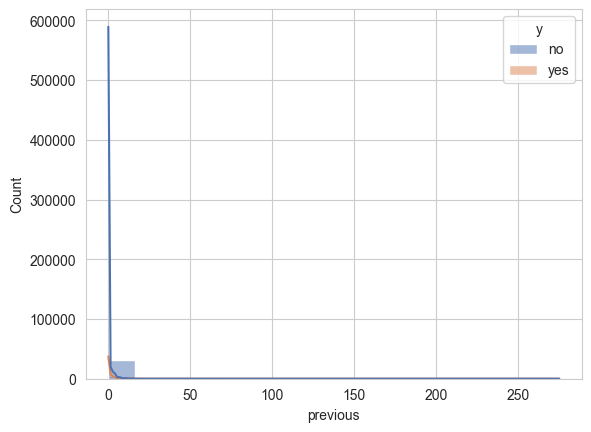

In [15]:
sns.histplot(train, x = "previous", hue = target, kde = True);

Como variables numéricas, podemos observar algo de interés en: duration, day, age, pdays, previous. Serán las que utilicemos como posibles features numéricas.

In [34]:
feat_num = ["age", "day", "duration", "pdays"]

In [35]:
train[feat_num].corr()

,age,day,duration,pdays
age,1.000000,-0.007882,-0.007414,-0.023231
day,-0.007882,1.000000,-0.025719,-0.094405
duration,-0.007414,-0.025719,1.000000,-0.001179
pdays,-0.023231,-0.094405,-0.001179,1.000000


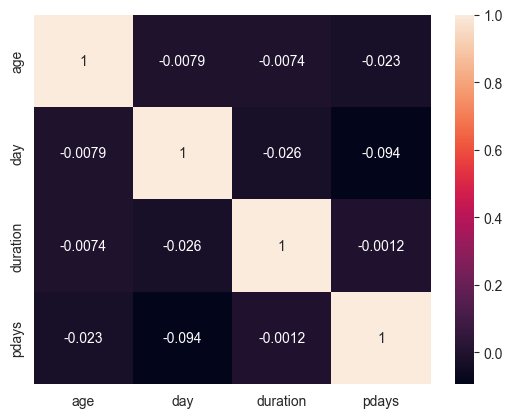

In [36]:
sns.heatmap(train[feat_num].corr(), annot = True);

No observamos mucha correlación entre variables numéricas, únicamente entre pdays y previous, pero tampoco es una correlación demasiado alta. Por ello, vamos a utilizar estas variables numéricas como features de nuestro modelo.

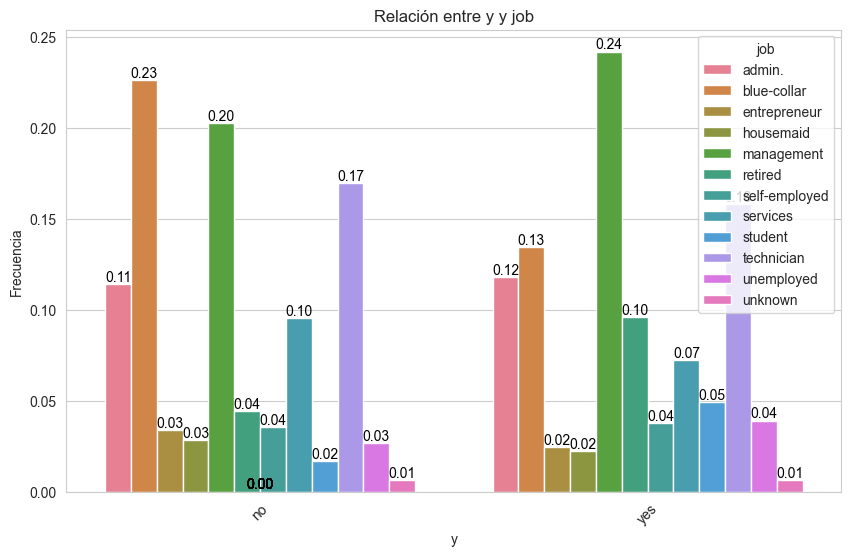

In [20]:
plot_categorical_relationship_fin(train, target, "job", relative_freq= True, show_values=True);

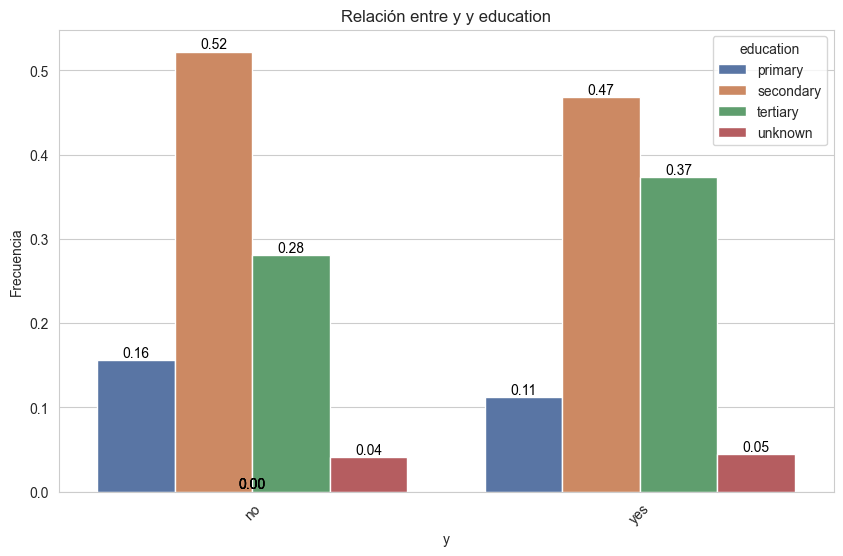

In [21]:
plot_categorical_relationship_fin(train, target, "education", relative_freq= True, show_values=True);

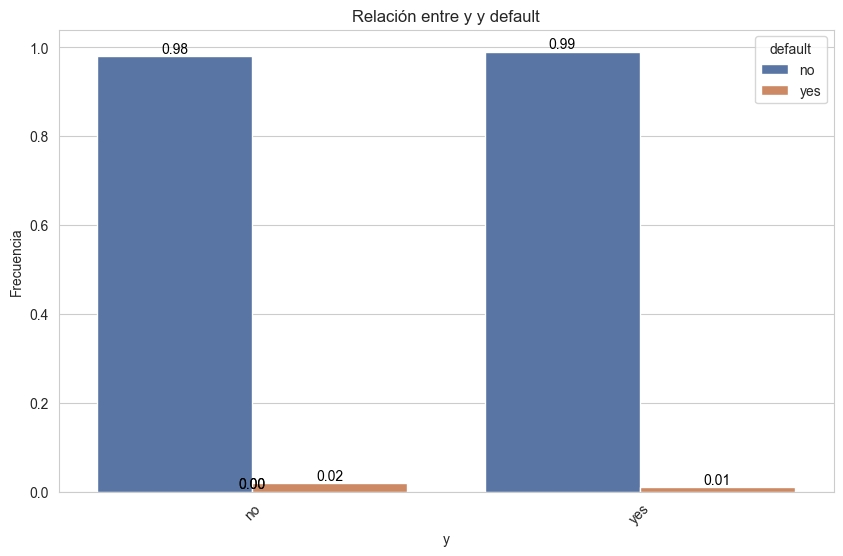

In [23]:
plot_categorical_relationship_fin(train, target, "default", relative_freq= True, show_values=True);

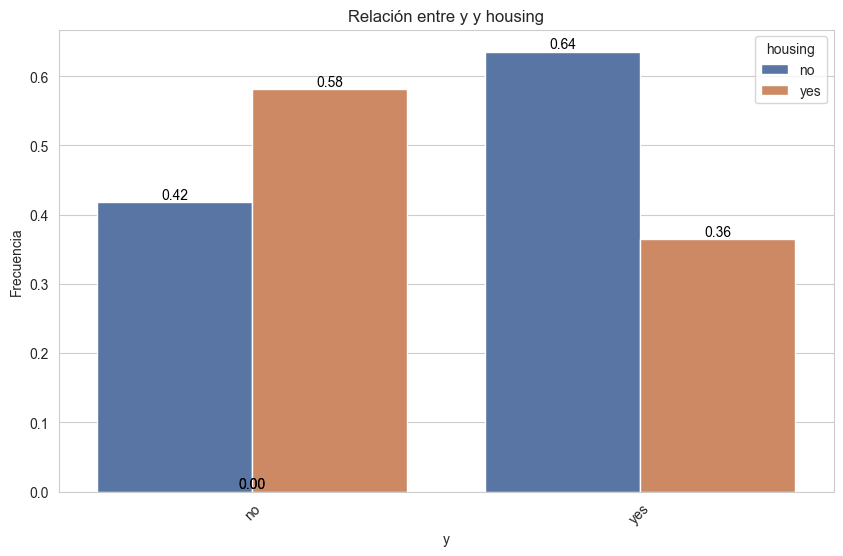

In [24]:
plot_categorical_relationship_fin(train, target, "housing", relative_freq= True, show_values=True);

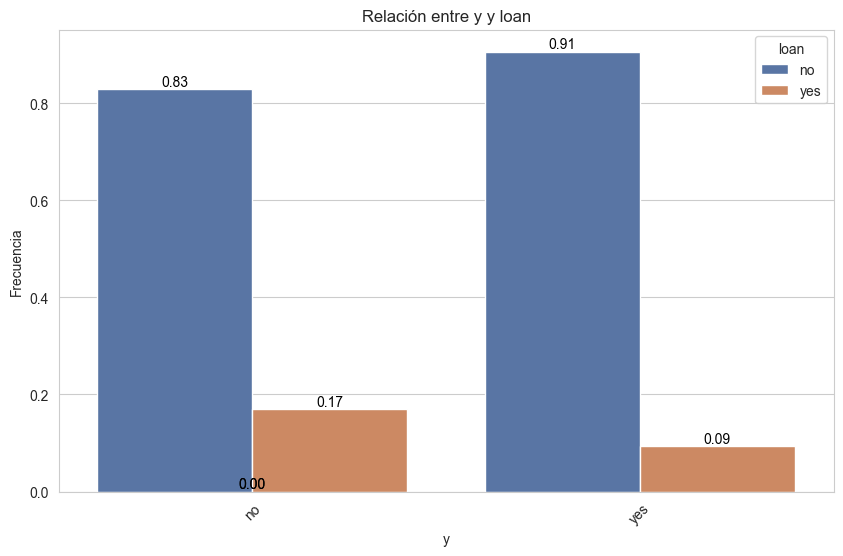

In [25]:
plot_categorical_relationship_fin(train, target, "loan", relative_freq= True, show_values=True);

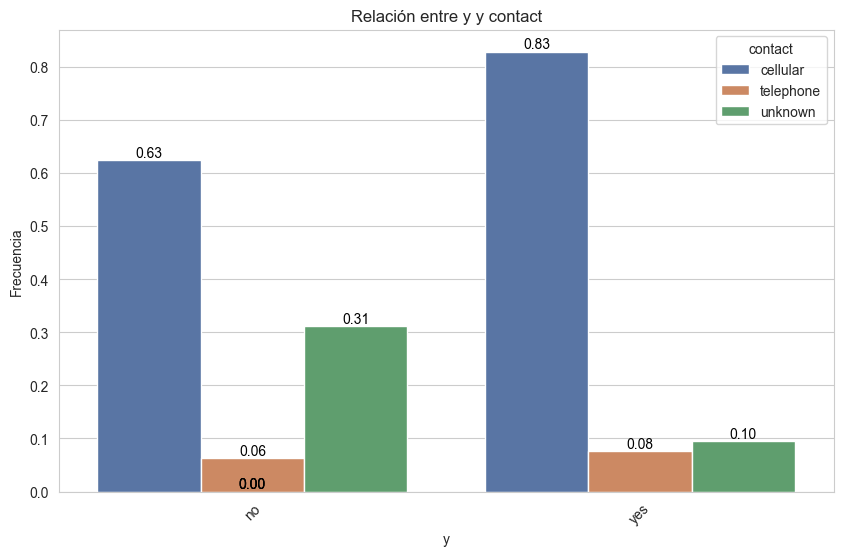

In [26]:
plot_categorical_relationship_fin(train, target, "contact", relative_freq= True, show_values=True);

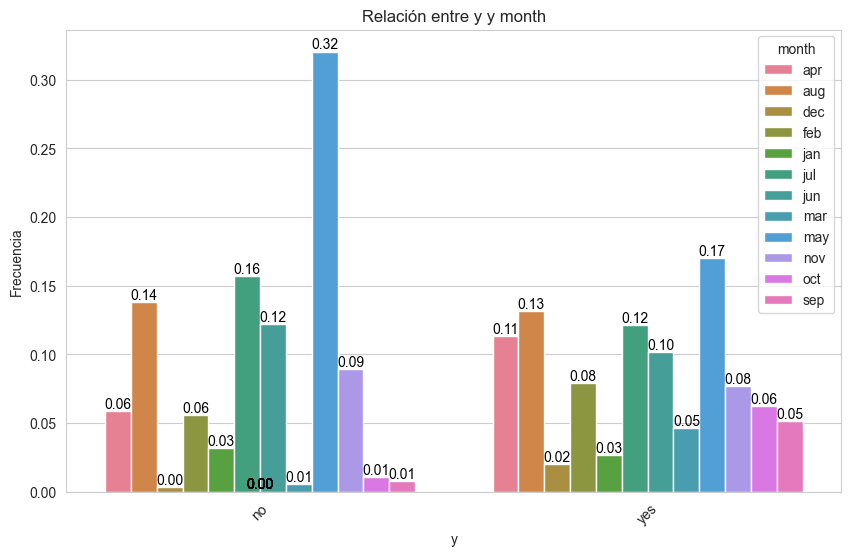

In [27]:
plot_categorical_relationship_fin(train, target, "month", relative_freq= True, show_values=True);

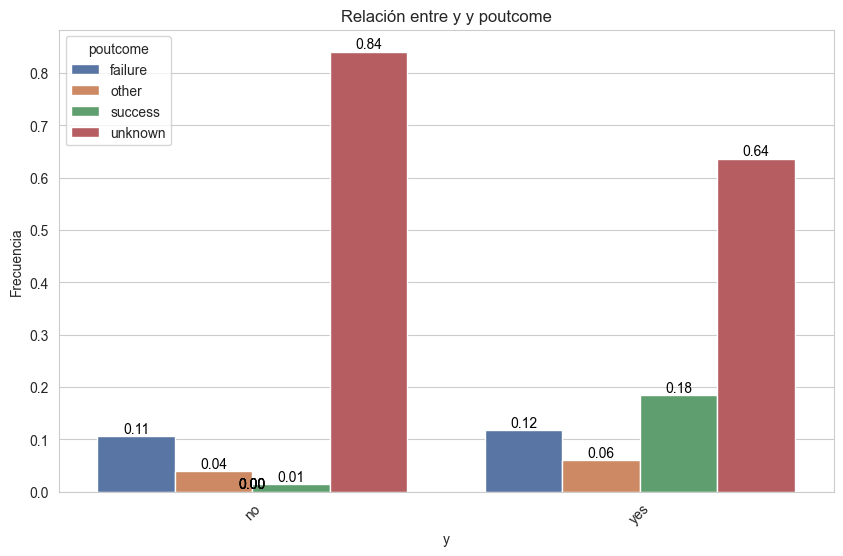

In [28]:
plot_categorical_relationship_fin(train, target, "poutcome", relative_freq= True, show_values=True);

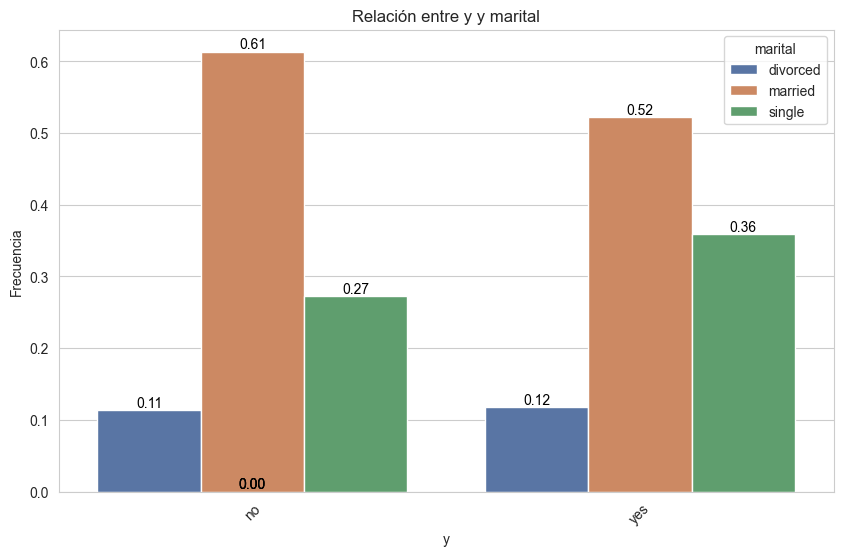

In [22]:
plot_categorical_relationship_fin(train, target, "marital", relative_freq= True, show_values=True);

Podemos destacar algunas categóricas que sí tienen relación: marital, loan, housing, poutcome, education, month, así que serán las elegidas como features.

In [37]:
# Nuestra elección de features categóricas es la siguiente:
feat_cat = ["marital", "education", "housing", "loan", "month", "poutcome"]
total_features = feat_num + feat_cat

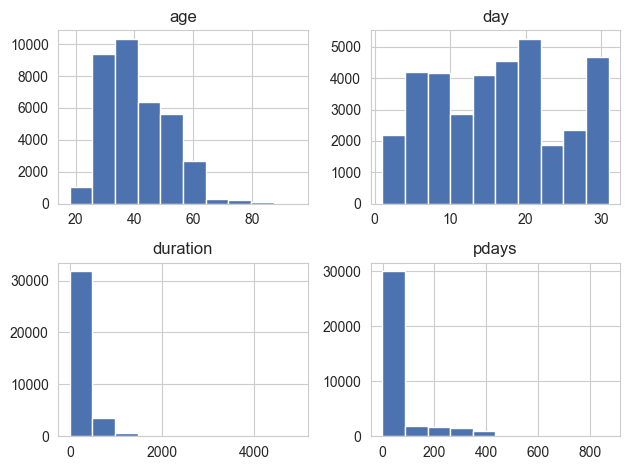

In [38]:
train[feat_num].hist()
plt.tight_layout();

No encontramos una distribución normal en las variables numéricas, pero no es necesario normalizarlas puesto que vamos a utilizar como modelo un arbol de decisiones. Pero sí vamos a transformar las categóricas, ya que necesitan ser transformadas a tipo numérico.

In [112]:
# Utilizamos OrdinalEncoder:
enc = OrdinalEncoder()
categ = feat_cat + [target]

df[categ] = enc.fit_transform(df[categ])

In [120]:
# Dividimos entre x e y:
X_train = train[categ + feat_num].drop(columns = target)
y_train = train[target]
X_test = test[categ + feat_num].drop(columns = target)
y_test = test[target]

In [123]:
# Entrenamos el arbol de decisiones:
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [125]:
y_pred_tree = tree.predict(X_test)

In [126]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93      7952
         1.0       0.47      0.49      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.71      0.70      9043
weighted avg       0.87      0.87      0.87      9043



In [128]:
param_grid = {
    "max_depth": [1, 5, 10, 25],
    "min_samples_split": np.arange(1000, 10000, 1000),
    "min_samples_leaf": np.arange(500, 1000, 100)
}

In [129]:
# Utilizamos random search para ver si podemos optimizar los hiperparámetros de nuestro modelo:
random_search = RandomizedSearchCV(tree, # El modelo que quiero entrenar
                                   param_grid, # El grid de parámetros
                                   random_state=1, # Semilla
                                   n_iter=200, # Nº de iteraciones del random search
                                   cv=10, # Folds del cross validation
                                   scoring="accuracy", # Métrica que quiero optimizar
                                   n_jobs = -1 # Paralelizar
                                  )

random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([20, 30, 40, 50, 60, 70, 80, 90]),
                                        'min_samples_leaf': array([500, 550, 600, 650, 700, 750, 800, 850, 900, 950]),
                                        'min_samples_split': array([1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000,
       6500, 7000, 7500, 8000, 8500, 9000, 9500])},
                   random_state=1, scoring='accuracy')

In [130]:
random_search.best_params_

{'min_samples_split': np.int64(2500),
 'min_samples_leaf': np.int64(900),
 'max_depth': np.int64(90)}

In [131]:
random_search.best_score_

np.float64(0.8961513706782867)

In [132]:
print(classification_report(y_test, random_search.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      7952
         1.0       0.57      0.20      0.29      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.59      0.61      9043
weighted avg       0.86      0.89      0.86      9043

